In [1]:
import pandas as pd
import os
import requests
from tqdm import tqdm

# Constants
TOP_N = 50
IMAGES_PER_CLASS = 40
CSV_PATH = '/kaggle/input/cnn-data-1/train.csv'  
OUTPUT_DIR = '/kaggle/temp/raw-data'  

# Load CSV
df = pd.read_csv(CSV_PATH)

# Top 10 landmark classes
top_classes = df['landmark_id'].value_counts().head(TOP_N).index.tolist()

# Select images
selected_df = pd.concat([
    df[df['landmark_id'] == cls].head(IMAGES_PER_CLASS)
    for cls in top_classes
])

print(f"Selected {len(selected_df)} images across {TOP_N} classes.")

# Set custom headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

# Download images
for _, row in tqdm(selected_df.iterrows(), total=len(selected_df)):
    cls_id = str(row['landmark_id'])
    img_id = row['id']
    url = row['url']

    class_dir = os.path.join(OUTPUT_DIR, cls_id)
    os.makedirs(class_dir, exist_ok=True)

    img_path = os.path.join(class_dir, f"{img_id}.jpg")
    if os.path.exists(img_path):
        continue  # Skip if already exists

    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            with open(img_path, 'wb') as f:
                f.write(response.content)
        else:
            print(f"Failed to download: {url} (Status: {response.status_code})")
    except Exception as e:
        print(f"Error downloading {url}: {e}")


Selected 2000 images across 50 classes.


  6%|▌         | 119/2000 [01:15<12:07,  2.59it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/4/46/%D0%94%D0%B7%D0%B2%D1%96%D0%BD%D0%BD%D0%B8%D1%86%D1%8F_%D1%85%D1%80%D0%B0%D0%BC%D1%83_%D1%81%D0%B2%D1%8F%D1%82%D0%B8%D1%85_%D0%9A%D0%B8%D1%80%D0%B8%D0%BB%D0%B0_%D1%82%D0%B0_%D0%9C%D0%B5%D1%84%D0%BE%D0%B4%D1%96%D1%8F_%2A_%D0%9B%D1%8C%D0%B2%D1%96%D0%B2_%2A_1.jpg (Status: 404)


 32%|███▏      | 633/2000 [06:03<10:52,  2.09it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/1/1e/DSC_0431_%288106313901%29.jpg (Status: 404)


 50%|█████     | 1007/2000 [10:04<07:43,  2.14it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/1/1d/%E1%83%9C%E1%83%98%E1%83%90%E1%83%92%E1%83%90%E1%83%A0%E1%83%90_15.jpg (Status: 404)


 52%|█████▏    | 1047/2000 [10:25<07:29,  2.12it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/4/4f/%E1%83%99%E1%83%90%E1%83%9C%E1%83%98%E1%83%9D%E1%83%9C%E1%83%98_6.jpg (Status: 404)


 55%|█████▍    | 1098/2000 [11:04<06:47,  2.21it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/c/c3/Tithonia_rotundifolia_%28Compositae%29_fllower.JPG (Status: 404)


 60%|██████    | 1201/2000 [12:58<12:22,  1.08it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/4/45/%D0%9C%D0%BE%D0%B3%D0%B8%D0%BB%D0%B0_%D0%BF%D0%B0%D1%80%D1%82%D0%B8%D0%B9%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B4%D0%B5%D1%8F%D1%82%D0%B5%D0%BB%D1%8F_%D0%98%D0%B2%D0%B0%D0%BD%D0%B0_%D0%9A%D0%B0%D0%B1%D0%B0%D0%BD%D0%BE%D0%B2%D0%B0.JPG (Status: 404)


 61%|██████▏   | 1227/2000 [13:41<06:05,  2.12it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/5/5f/%D0%9C%D0%BE%D0%B3%D0%B8%D0%BB%D0%B0_%D1%83%D1%87%D1%91%D0%BD%D0%BE%D0%B3%D0%BE_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D1%8F_%D0%90%D0%B2%D0%B5%D1%80%D1%8C%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0.JPG (Status: 404)


 62%|██████▏   | 1231/2000 [13:43<04:46,  2.69it/s]

Failed to download: http://upload.wikimedia.org/wikipedia/commons/3/3f/%D0%9C%D0%BE%D0%B3%D0%B8%D0%BB%D0%B0_%D0%BA%D0%BE%D1%81%D0%BC%D0%BE%D0%BD%D0%B0%D0%B2%D1%82%D0%B0_%D0%9F%D0%B0%D0%B2%D0%BB%D0%B0_%D0%91%D0%B5%D0%BB%D1%8F%D0%B5%D0%B2%D0%B0.JPG (Status: 404)
Failed to download: https://upload.wikimedia.org/wikipedia/commons/6/60/%D0%9C%D0%BE%D0%B3%D0%B8%D0%BB%D0%B0_%D1%88%D0%B0%D1%85%D0%BC%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B0_%D0%91%D0%BE%D1%80%D0%B8%D1%81%D0%B0_%D0%A1%D0%B0%D1%85%D0%B0%D1%80%D0%BE%D0%B2%D0%B0.JPG (Status: 404)


 62%|██████▏   | 1234/2000 [13:45<06:38,  1.92it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/8/8a/%D0%9A%D0%B0%D1%82%D1%83%D0%BA%D0%BE%D0%B2.jpg (Status: 404)


 62%|██████▏   | 1243/2000 [13:50<04:56,  2.56it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/2/23/%D0%94%D0%B6%D0%B5%D1%80%D0%B5%D0%BB%D0%BE_%D0%BF%D0%BE%D0%B4%D0%BE%D1%80%D0%BE%D0%B7%D1%96_%D0%B7_%D1%84%D0%BE%D1%80%D1%82%D0%B5%D1%86%D1%96_%D0%A2%D1%83%D1%81%D1%82%D0%B0%D0%BD%D1%8C.jpg (Status: 404)


 67%|██████▋   | 1346/2000 [14:57<04:18,  2.53it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/6/65/%D0%9FIMG_6306.jpg (Status: 404)


 68%|██████▊   | 1359/2000 [15:03<04:18,  2.48it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/5/51/%D0%A5%D0%BE%D1%82%D0%B8%D0%BD%D1%81%D1%8C%D0%BA%D0%B0_%D1%84%D0%BE%D1%80%D1%82%D0%B5%D1%86%D1%8F._%D0%92%D0%BE%D1%80%D0%BE%D1%82%D0%B0_%D0%BF%D1%96%D0%B2%D0%BD%D1%96%D1%87%D0%BD%D0%BE%D1%97_%D0%B1%D1%80%D0%B0%D0%BC%D0%B8.JPG (Status: 404)


 80%|███████▉  | 1594/2000 [17:56<02:37,  2.58it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/b/b3/Isreal160_%28883648444%29.jpg (Status: 404)


 84%|████████▍ | 1686/2000 [18:41<02:08,  2.45it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/9/95/Golden_Gate_Bridge_Look_Around_Feature_Test_-_panoramio_-_A_J_Butler_%2811%29.jpg (Status: 404)


 85%|████████▍ | 1693/2000 [18:45<02:11,  2.33it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/3/3f/Golden_Gate_Bridge_Look_Around_Feature_Test_-_panoramio_-_A_J_Butler_%2815%29.jpg (Status: 404)


 85%|████████▌ | 1701/2000 [18:48<01:42,  2.93it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/2/20/Golden_Gate_Bridge_79.jpg (Status: 404)


 95%|█████████▌| 1908/2000 [20:58<00:47,  1.93it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/c/c8/Unnamed1_-_panoramio_%281268%29.jpg (Status: 404)


 96%|█████████▌| 1914/2000 [21:01<00:38,  2.22it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/4/40/Unnamed1_-_panoramio_%281264%29.jpg (Status: 404)


100%|██████████| 2000/2000 [21:45<00:00,  1.53it/s]


In [2]:
import os
from collections import defaultdict

# Path where raw images are stored class-wise
root_dir = '/kaggle/temp/raw-data'

# Dictionary to store counts
class_counts = defaultdict(int)

# Count number of images per class
for class_name in os.listdir(root_dir):
    class_dir = os.path.join(root_dir, class_name)
    if os.path.isdir(class_dir):
        image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        class_counts[class_name] = len(image_files)

# Print summary
for cls, count in class_counts.items():
    status = "✅ OK" if count == 10 else "❌ Check"
    print(f"Class {cls}: {count} images {status}")


Class 47712: 39 images ❌ Check
Class 46500: 40 images ❌ Check
Class 46705: 39 images ❌ Check
Class 187209: 35 images ❌ Check
Class 194914: 40 images ❌ Check
Class 51856: 40 images ❌ Check
Class 83144: 40 images ❌ Check
Class 45428: 40 images ❌ Check
Class 171683: 40 images ❌ Check
Class 187779: 38 images ❌ Check
Class 84689: 40 images ❌ Check
Class 47133: 40 images ❌ Check
Class 20409: 40 images ❌ Check
Class 80177: 40 images ❌ Check
Class 36748: 40 images ❌ Check
Class 165900: 40 images ❌ Check
Class 86869: 40 images ❌ Check
Class 192931: 40 images ❌ Check
Class 138982: 40 images ❌ Check
Class 15427: 40 images ❌ Check
Class 151942: 40 images ❌ Check
Class 168098: 37 images ❌ Check
Class 62074: 40 images ❌ Check
Class 62798: 40 images ❌ Check
Class 41808: 39 images ❌ Check
Class 127516: 40 images ❌ Check
Class 176528: 40 images ❌ Check
Class 60532: 40 images ❌ Check
Class 149980: 38 images ❌ Check
Class 176018: 40 images ❌ Check
Class 120734: 40 images ❌ Check
Class 10618: 40 images ❌ 

In [ ]:
import os
from PIL import Image
from torchvision import transforms

# Path where your class-wise images are stored
root_dir = '/kaggle/temp/raw-data'

# Define the augmentation transformations (including resizing)
augment = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize first
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
])

# Number of augmentations you want to create for each image
NUM_AUGMENTATIONS = 5

# Loop through each class
for class_name in os.listdir(root_dir):
    class_dir = os.path.join(root_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    for img_file in os.listdir(class_dir):
        if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(class_dir, img_file)
        try:
            image = Image.open(img_path).convert("RGB")

            # Create the specified number of augmentations
            for i in range(1, NUM_AUGMENTATIONS + 1):  # Loop dynamically based on NUM_AUGMENTATIONS
                aug_image = augment(image)
                new_filename = f"aug_{i}_{img_file}"
                aug_image.save(os.path.join(class_dir, new_filename))

        except Exception as e:
            print(f"Error processing {img_path}: {e}")


In [3]:
import os
import json
import torch
from torchvision import transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
from tqdm import tqdm

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define image transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.to(device)
model.eval()

# Paths
root_dir = '/kaggle/temp/raw-data'
output_json = '/kaggle/working/landmark_coco_annotations.json'

# COCO structure placeholders
images = []
annotations = []
categories = []

# Category mapping
category_to_id = {}
annotation_id = 1
image_id = 1

# Loop through class folders
for class_id, class_name in enumerate(sorted(os.listdir(root_dir))):
    class_path = os.path.join(root_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    category_to_id[class_name] = class_id + 1  # COCO category IDs start from 1
    categories.append({
        "id": class_id + 1,
        "name": class_name,
        "supercategory": "landmark"
    })

    # Loop through images in this class
    for img_name in tqdm(os.listdir(class_path), desc=f'Processing {class_name}'):
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(class_path, img_name)

        try:
            image = Image.open(img_path).convert("RGB")
            width, height = image.size
            img_tensor = transform(image).unsqueeze(0).to(device)

            with torch.no_grad():
                outputs = model(img_tensor)[0]

            # Add image entry
            images.append({
                "id": image_id,
                "file_name": f"{class_name}/{img_name}",
                "width": width,
                "height": height
            })

            # Add bounding boxes
            for box, score in zip(outputs['boxes'], outputs['scores']):
                if score.item() < 0.7:
                    continue  # confidence threshold

                x_min, y_min, x_max, y_max = box.cpu().numpy().tolist()
                bbox_width = x_max - x_min
                bbox_height = y_max - y_min

                annotations.append({
                    "id": annotation_id,
                    "image_id": image_id,
                    "category_id": category_to_id[class_name],
                    "bbox": [x_min, y_min, bbox_width, bbox_height],
                    "area": bbox_width * bbox_height,
                    "iscrowd": 0
                })
                annotation_id += 1

            image_id += 1

        except Exception as e:
            print(f"Failed on {img_path}: {e}")

# Save to COCO JSON
coco_output = {
    "images": images,
    "annotations": annotations,
    "categories": categories
}

with open(output_json, 'w') as f:
    json.dump(coco_output, f, indent=4)

print(f"\n✅ COCO annotation saved to: {output_json}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 224MB/s] 
Processing 9070: 100%|██████████| 40/40 [00:10<00:00,  3.74it/s]


✅ COCO annotation saved to: /kaggle/working/landmark_coco_annotations.json


In [4]:
import os
import shutil
import json
from sklearn.model_selection import train_test_split

# Original dataset & annotation
dataset_dir = '/kaggle/temp/raw-data'
coco_json_path = '/kaggle/working/landmark_coco_annotations.json'

# Output dirs
train_dir = '/kaggle/temp/train'
val_dir = '/kaggle/temp/val'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Load COCO JSON
with open(coco_json_path, 'r') as f:
    coco_data = json.load(f)

# Maps for fast access
img_id_map = {img["file_name"]: img for img in coco_data["images"]}
ann_map = {}
for ann in coco_data["annotations"]:
    file_name = next(img["file_name"] for img in coco_data["images"] if img["id"] == ann["image_id"])
    if file_name not in ann_map:
        ann_map[file_name] = []
    ann_map[file_name].append(ann)

# Initialize new coco containers
train_images, val_images = [], []
train_annotations, val_annotations = [], []

# Track new IDs
new_image_id = 1
new_ann_id = 1

# Iterate over classes
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Get all image files
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not image_files:
        print(f"Warning: No images in '{class_name}'. Skipping.")
        continue

    # Split
    train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

    # Create class folders
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

    for split, files, img_list, ann_list, target_dir in [
        ('train', train_files, train_images, train_annotations, train_dir),
        ('val', val_files, val_images, val_annotations, val_dir),
    ]:
        for file in files:
            src = os.path.join(class_path, file)
            dst = os.path.join(target_dir, class_name, file)
            shutil.move(src, dst)

            full_path = f"{class_name}/{file}"
            if full_path in img_id_map:
                original_img = img_id_map[full_path]
                # Create a new image entry
                new_img = {
                    "id": new_image_id,
                    "file_name": full_path,
                    "width": original_img["width"],
                    "height": original_img["height"]
                }
                img_list.append(new_img)

                # Update corresponding annotations
                anns = ann_map.get(full_path, [])
                for ann in anns:
                    new_ann = {
                        "id": new_ann_id,
                        "image_id": new_image_id,
                        "category_id": ann["category_id"],
                        "bbox": ann["bbox"],
                        "area": ann["area"],
                        "iscrowd": 0
                    }
                    ann_list.append(new_ann)
                    new_ann_id += 1

                new_image_id += 1

    print(f"Class '{class_name}' — Train: {len(train_files)}, Val: {len(val_files)}")

# Save updated train and val COCO JSONs
train_json = {
    "images": train_images,
    "annotations": train_annotations,
    "categories": coco_data["categories"]
}

val_json = {
    "images": val_images,
    "annotations": val_annotations,
    "categories": coco_data["categories"]
}

with open('/kaggle/temp/train_coco.json', 'w') as f:
    json.dump(train_json, f, indent=4)

with open('/kaggle/temp/val_coco.json', 'w') as f:
    json.dump(val_json, f, indent=4)

print("✅ Dataset split complete. Annotations saved to train_coco.json and val_coco.json.")


Class '47712' — Train: 31, Val: 8
Class '46500' — Train: 32, Val: 8
Class '46705' — Train: 31, Val: 8
Class '187209' — Train: 28, Val: 7
Class '194914' — Train: 32, Val: 8
Class '51856' — Train: 32, Val: 8
Class '83144' — Train: 32, Val: 8
Class '45428' — Train: 32, Val: 8
Class '171683' — Train: 32, Val: 8
Class '187779' — Train: 30, Val: 8
Class '84689' — Train: 32, Val: 8
Class '47133' — Train: 32, Val: 8
Class '20409' — Train: 32, Val: 8
Class '80177' — Train: 32, Val: 8
Class '36748' — Train: 32, Val: 8
Class '165900' — Train: 32, Val: 8
Class '86869' — Train: 32, Val: 8
Class '192931' — Train: 32, Val: 8
Class '138982' — Train: 32, Val: 8
Class '15427' — Train: 32, Val: 8
Class '151942' — Train: 32, Val: 8
Class '168098' — Train: 29, Val: 8
Class '62074' — Train: 32, Val: 8
Class '62798' — Train: 32, Val: 8
Class '41808' — Train: 31, Val: 8
Class '127516' — Train: 32, Val: 8
Class '176528' — Train: 32, Val: 8
Class '60532' — Train: 32, Val: 8
Class '149980' — Train: 30, Val: 8
Cl

In [9]:
import matplotlib.pyplot as plt

def train_protonet(dataset_path, model, episodes=EPISODES, is_validation=False):
    dataset = FewShotDataset(dataset_path, transform)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)

    all_losses = []
    all_accuracies = []

    for episode in tqdm(range(episodes), desc="Validation" if is_validation else "Training"):
        model.train(not is_validation)
        support_items, query_items = dataset.get_episode()

        support_imgs, support_labels = dataset.load_images(support_items)
        query_imgs, query_labels = dataset.load_images(query_items)

        support_imgs, query_imgs = support_imgs.to(device), query_imgs.to(device)
        support_labels, query_labels = support_labels.to(device), query_labels.to(device)

        # Encode
        support_emb = model(support_imgs)
        query_emb = model(query_imgs)

        # Prototype Calculation
        prototypes = []
        for cls in torch.unique(support_labels):
            proto = support_emb[support_labels == cls].mean(dim=0)
            prototypes.append(proto)
        prototypes = torch.stack(prototypes)

        # Distance & Loss
        dists = euclidean_distance(query_emb, prototypes)
        logits = -dists
        loss = F.cross_entropy(logits, query_labels)

        if not is_validation:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        acc = (logits.argmax(dim=1) == query_labels).float().mean().item()
        all_losses.append(loss.item())
        all_accuracies.append(acc)

        print(f"{'Val' if is_validation else 'Train'} Ep {episode+1}/{episodes} | Loss: {loss.item():.4f} | Acc: {acc*100:.2f}%")

    # Compute stats
    mean_loss = np.mean(all_losses)
    mean_acc = np.mean(all_accuracies)

    print(f"\n{'Validation' if is_validation else 'Training'} Results over {episodes} episodes:")
    print(f"Mean Accuracy: {mean_acc*100:.2f}%")
    print(f"Mean Loss: {mean_loss:.4f}")

    # Plot Accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(all_accuracies, marker='o', color='skyblue', label='Accuracy')
    plt.title(f"{'Validation' if is_validation else 'Training'} Accuracy per Episode")
    plt.xlabel('Episode')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(all_losses, marker='x', color='salmon', label='Loss')
    plt.title(f"{'Validation' if is_validation else 'Training'} Loss per Episode")
    plt.xlabel('Episode')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    plt.suptitle(f"{'Validation' if is_validation else 'Training'} Performance over {episodes} Episodes", fontsize=14)
    plt.tight_layout()
    plt.show()

    return model


Training:   1%|          | 1/100 [00:05<09:30,  5.76s/it]

Train Ep 1/100 | Loss: 3.4400 | Acc: 72.00%


Training:   2%|▏         | 2/100 [00:14<12:14,  7.50s/it]

Train Ep 2/100 | Loss: 2.9486 | Acc: 60.00%


Training:   3%|▎         | 3/100 [00:24<13:54,  8.60s/it]

Train Ep 3/100 | Loss: 2.5989 | Acc: 68.00%


Training:   4%|▍         | 4/100 [00:37<16:28, 10.30s/it]

Train Ep 4/100 | Loss: 7.1132 | Acc: 56.00%


Training:   5%|▌         | 5/100 [00:44<14:45,  9.32s/it]

Train Ep 5/100 | Loss: 4.9864 | Acc: 60.00%


Training:   6%|▌         | 6/100 [00:51<13:17,  8.49s/it]

Train Ep 6/100 | Loss: 2.1624 | Acc: 80.00%


Training:   7%|▋         | 7/100 [01:02<14:16,  9.21s/it]

Train Ep 7/100 | Loss: 2.9411 | Acc: 80.00%


Training:   8%|▊         | 8/100 [01:15<15:51, 10.34s/it]

Train Ep 8/100 | Loss: 2.1805 | Acc: 68.00%


Training:   9%|▉         | 9/100 [01:27<16:46, 11.06s/it]

Train Ep 9/100 | Loss: 4.8434 | Acc: 56.00%


Training:  10%|█         | 10/100 [01:38<16:23, 10.93s/it]

Train Ep 10/100 | Loss: 5.0797 | Acc: 60.00%


Training:  11%|█         | 11/100 [01:49<16:22, 11.04s/it]

Train Ep 11/100 | Loss: 1.6733 | Acc: 64.00%


Training:  12%|█▏        | 12/100 [01:57<14:51, 10.13s/it]

Train Ep 12/100 | Loss: 3.5702 | Acc: 56.00%


Training:  13%|█▎        | 13/100 [02:07<14:29,  9.99s/it]

Train Ep 13/100 | Loss: 4.9407 | Acc: 76.00%


Training:  14%|█▍        | 14/100 [02:18<14:43, 10.28s/it]

Train Ep 14/100 | Loss: 2.9755 | Acc: 76.00%


Training:  15%|█▌        | 15/100 [02:28<14:28, 10.22s/it]

Train Ep 15/100 | Loss: 1.5990 | Acc: 84.00%


Training:  16%|█▌        | 16/100 [02:35<13:00,  9.29s/it]

Train Ep 16/100 | Loss: 2.3138 | Acc: 68.00%


Training:  17%|█▋        | 17/100 [02:45<12:53,  9.32s/it]

Train Ep 17/100 | Loss: 3.1767 | Acc: 60.00%


Training:  18%|█▊        | 18/100 [02:52<12:04,  8.84s/it]

Train Ep 18/100 | Loss: 2.4062 | Acc: 68.00%


Training:  19%|█▉        | 19/100 [03:03<12:43,  9.43s/it]

Train Ep 19/100 | Loss: 0.2719 | Acc: 88.00%


Training:  20%|██        | 20/100 [03:09<11:09,  8.37s/it]

Train Ep 20/100 | Loss: 1.9476 | Acc: 64.00%


Training:  21%|██        | 21/100 [03:20<12:01,  9.13s/it]

Train Ep 21/100 | Loss: 2.0860 | Acc: 64.00%


Training:  22%|██▏       | 22/100 [03:33<13:21, 10.28s/it]

Train Ep 22/100 | Loss: 1.9752 | Acc: 64.00%


Training:  23%|██▎       | 23/100 [03:41<12:13,  9.52s/it]

Train Ep 23/100 | Loss: 1.6237 | Acc: 64.00%


Training:  24%|██▍       | 24/100 [03:51<12:17,  9.70s/it]

Train Ep 24/100 | Loss: 0.7144 | Acc: 88.00%


Training:  25%|██▌       | 25/100 [03:59<11:31,  9.23s/it]

Train Ep 25/100 | Loss: 0.3484 | Acc: 84.00%


Training:  26%|██▌       | 26/100 [04:09<11:34,  9.39s/it]

Train Ep 26/100 | Loss: 2.4966 | Acc: 60.00%


Training:  27%|██▋       | 27/100 [04:17<10:57,  9.01s/it]

Train Ep 27/100 | Loss: 1.7394 | Acc: 68.00%


Training:  28%|██▊       | 28/100 [04:29<12:06, 10.09s/it]

Train Ep 28/100 | Loss: 1.8494 | Acc: 68.00%


Training:  29%|██▉       | 29/100 [04:38<11:35,  9.79s/it]

Train Ep 29/100 | Loss: 1.4185 | Acc: 76.00%


Training:  30%|███       | 30/100 [04:47<11:04,  9.50s/it]

Train Ep 30/100 | Loss: 0.2728 | Acc: 92.00%


Training:  31%|███       | 31/100 [04:55<10:16,  8.94s/it]

Train Ep 31/100 | Loss: 1.5581 | Acc: 56.00%


Training:  32%|███▏      | 32/100 [05:02<09:25,  8.31s/it]

Train Ep 32/100 | Loss: 1.0579 | Acc: 72.00%


Training:  33%|███▎      | 33/100 [05:15<10:50,  9.71s/it]

Train Ep 33/100 | Loss: 1.6328 | Acc: 60.00%


Training:  34%|███▍      | 34/100 [05:22<09:46,  8.88s/it]

Train Ep 34/100 | Loss: 1.3228 | Acc: 76.00%


Training:  35%|███▌      | 35/100 [05:30<09:21,  8.64s/it]

Train Ep 35/100 | Loss: 1.4992 | Acc: 60.00%


Training:  36%|███▌      | 36/100 [05:43<10:40, 10.00s/it]

Train Ep 36/100 | Loss: 0.9560 | Acc: 64.00%


Training:  37%|███▋      | 37/100 [05:51<09:51,  9.38s/it]

Train Ep 37/100 | Loss: 1.3955 | Acc: 68.00%


Training:  38%|███▊      | 38/100 [06:04<10:44, 10.39s/it]

Train Ep 38/100 | Loss: 1.4854 | Acc: 72.00%


Training:  39%|███▉      | 39/100 [06:11<09:36,  9.45s/it]

Train Ep 39/100 | Loss: 0.6070 | Acc: 84.00%


Training:  40%|████      | 40/100 [06:19<09:06,  9.11s/it]

Train Ep 40/100 | Loss: 1.7586 | Acc: 52.00%


Training:  41%|████      | 41/100 [06:29<09:14,  9.40s/it]

Train Ep 41/100 | Loss: 0.6675 | Acc: 76.00%


Training:  42%|████▏     | 42/100 [06:41<09:40, 10.01s/it]

Train Ep 42/100 | Loss: 1.4999 | Acc: 56.00%


Training:  43%|████▎     | 43/100 [06:48<08:53,  9.36s/it]

Train Ep 43/100 | Loss: 0.9530 | Acc: 72.00%


Training:  44%|████▍     | 44/100 [06:58<08:46,  9.40s/it]

Train Ep 44/100 | Loss: 1.1033 | Acc: 56.00%


Training:  45%|████▌     | 45/100 [07:06<08:20,  9.10s/it]

Train Ep 45/100 | Loss: 0.2906 | Acc: 80.00%


Training:  46%|████▌     | 46/100 [07:14<07:42,  8.57s/it]

Train Ep 46/100 | Loss: 1.1116 | Acc: 68.00%


Training:  47%|████▋     | 47/100 [07:23<07:45,  8.78s/it]

Train Ep 47/100 | Loss: 0.5155 | Acc: 76.00%


Training:  48%|████▊     | 48/100 [07:31<07:28,  8.63s/it]

Train Ep 48/100 | Loss: 0.4795 | Acc: 76.00%


Training:  49%|████▉     | 49/100 [07:38<06:48,  8.02s/it]

Train Ep 49/100 | Loss: 0.6245 | Acc: 80.00%


Training:  50%|█████     | 50/100 [07:48<07:05,  8.52s/it]

Train Ep 50/100 | Loss: 0.5846 | Acc: 84.00%


Training:  51%|█████     | 51/100 [07:55<06:49,  8.35s/it]

Train Ep 51/100 | Loss: 0.5965 | Acc: 76.00%


Training:  52%|█████▏    | 52/100 [08:03<06:28,  8.10s/it]

Train Ep 52/100 | Loss: 0.9305 | Acc: 72.00%


Training:  53%|█████▎    | 53/100 [08:10<06:08,  7.84s/it]

Train Ep 53/100 | Loss: 1.0450 | Acc: 76.00%


Training:  54%|█████▍    | 54/100 [08:21<06:38,  8.65s/it]

Train Ep 54/100 | Loss: 1.0174 | Acc: 52.00%


Training:  55%|█████▌    | 55/100 [08:33<07:17,  9.73s/it]

Train Ep 55/100 | Loss: 1.0123 | Acc: 56.00%


Training:  56%|█████▌    | 56/100 [08:40<06:37,  9.04s/it]

Train Ep 56/100 | Loss: 0.9298 | Acc: 60.00%


Training:  57%|█████▋    | 57/100 [08:51<06:43,  9.38s/it]

Train Ep 57/100 | Loss: 1.0867 | Acc: 64.00%


Training:  58%|█████▊    | 58/100 [09:01<06:43,  9.61s/it]

Train Ep 58/100 | Loss: 1.2123 | Acc: 60.00%


Training:  59%|█████▉    | 59/100 [09:08<06:04,  8.90s/it]

Train Ep 59/100 | Loss: 0.9185 | Acc: 72.00%


Training:  60%|██████    | 60/100 [09:18<06:09,  9.24s/it]

Train Ep 60/100 | Loss: 0.7612 | Acc: 72.00%


Training:  61%|██████    | 61/100 [09:27<05:55,  9.10s/it]

Train Ep 61/100 | Loss: 0.9918 | Acc: 60.00%


Training:  62%|██████▏   | 62/100 [09:36<05:43,  9.03s/it]

Train Ep 62/100 | Loss: 0.9138 | Acc: 60.00%


Training:  63%|██████▎   | 63/100 [09:44<05:20,  8.67s/it]

Train Ep 63/100 | Loss: 0.3555 | Acc: 88.00%


Training:  64%|██████▍   | 64/100 [09:52<05:14,  8.73s/it]

Train Ep 64/100 | Loss: 1.1225 | Acc: 56.00%


Training:  65%|██████▌   | 65/100 [09:59<04:39,  7.98s/it]

Train Ep 65/100 | Loss: 0.6665 | Acc: 76.00%


Training:  66%|██████▌   | 66/100 [10:10<05:06,  9.02s/it]

Train Ep 66/100 | Loss: 0.9874 | Acc: 56.00%


Training:  67%|██████▋   | 67/100 [10:21<05:17,  9.62s/it]

Train Ep 67/100 | Loss: 0.6910 | Acc: 80.00%


Training:  68%|██████▊   | 68/100 [10:29<04:46,  8.96s/it]

Train Ep 68/100 | Loss: 0.5449 | Acc: 76.00%


Training:  69%|██████▉   | 69/100 [10:39<04:55,  9.54s/it]

Train Ep 69/100 | Loss: 0.9196 | Acc: 64.00%


Training:  70%|███████   | 70/100 [10:48<04:36,  9.20s/it]

Train Ep 70/100 | Loss: 0.7170 | Acc: 68.00%


Training:  71%|███████   | 71/100 [10:57<04:29,  9.28s/it]

Train Ep 71/100 | Loss: 0.6646 | Acc: 68.00%


Training:  72%|███████▏  | 72/100 [11:04<04:00,  8.59s/it]

Train Ep 72/100 | Loss: 0.5552 | Acc: 80.00%


Training:  73%|███████▎  | 73/100 [11:18<04:35, 10.20s/it]

Train Ep 73/100 | Loss: 0.9434 | Acc: 60.00%


Training:  74%|███████▍  | 74/100 [11:29<04:30, 10.40s/it]

Train Ep 74/100 | Loss: 1.4117 | Acc: 52.00%


Training:  75%|███████▌  | 75/100 [11:37<04:03,  9.74s/it]

Train Ep 75/100 | Loss: 0.6583 | Acc: 76.00%


Training:  76%|███████▌  | 76/100 [11:51<04:20, 10.85s/it]

Train Ep 76/100 | Loss: 1.4648 | Acc: 56.00%


Training:  77%|███████▋  | 77/100 [12:03<04:17, 11.21s/it]

Train Ep 77/100 | Loss: 0.7530 | Acc: 72.00%


Training:  78%|███████▊  | 78/100 [12:12<03:54, 10.65s/it]

Train Ep 78/100 | Loss: 0.8144 | Acc: 72.00%


Training:  79%|███████▉  | 79/100 [12:19<03:17,  9.42s/it]

Train Ep 79/100 | Loss: 1.7408 | Acc: 52.00%


Training:  80%|████████  | 80/100 [12:31<03:27, 10.39s/it]

Train Ep 80/100 | Loss: 0.7078 | Acc: 80.00%


Training:  81%|████████  | 81/100 [12:40<03:09, 10.00s/it]

Train Ep 81/100 | Loss: 0.3348 | Acc: 88.00%


Training:  82%|████████▏ | 82/100 [12:47<02:39,  8.85s/it]

Train Ep 82/100 | Loss: 0.6278 | Acc: 84.00%


Training:  83%|████████▎ | 83/100 [12:54<02:20,  8.28s/it]

Train Ep 83/100 | Loss: 0.7116 | Acc: 80.00%


Training:  84%|████████▍ | 84/100 [13:04<02:21,  8.84s/it]

Train Ep 84/100 | Loss: 0.2483 | Acc: 96.00%


Training:  85%|████████▌ | 85/100 [13:13<02:15,  9.04s/it]

Train Ep 85/100 | Loss: 0.2677 | Acc: 92.00%


Training:  86%|████████▌ | 86/100 [13:22<02:06,  9.01s/it]

Train Ep 86/100 | Loss: 0.2601 | Acc: 92.00%


Training:  87%|████████▋ | 87/100 [13:33<02:05,  9.62s/it]

Train Ep 87/100 | Loss: 0.3030 | Acc: 88.00%


Training:  88%|████████▊ | 88/100 [13:45<02:03, 10.25s/it]

Train Ep 88/100 | Loss: 0.5830 | Acc: 80.00%


Training:  89%|████████▉ | 89/100 [13:55<01:50, 10.08s/it]

Train Ep 89/100 | Loss: 0.7141 | Acc: 68.00%


Training:  90%|█████████ | 90/100 [14:04<01:39,  9.99s/it]

Train Ep 90/100 | Loss: 0.2162 | Acc: 88.00%


Training:  91%|█████████ | 91/100 [14:12<01:24,  9.37s/it]

Train Ep 91/100 | Loss: 0.1939 | Acc: 92.00%


Training:  92%|█████████▏| 92/100 [14:21<01:13,  9.20s/it]

Train Ep 92/100 | Loss: 0.7078 | Acc: 80.00%


Training:  93%|█████████▎| 93/100 [14:33<01:09,  9.89s/it]

Train Ep 93/100 | Loss: 0.6768 | Acc: 76.00%


Training:  94%|█████████▍| 94/100 [14:40<00:55,  9.19s/it]

Train Ep 94/100 | Loss: 0.9390 | Acc: 72.00%


Training:  95%|█████████▌| 95/100 [14:47<00:41,  8.39s/it]

Train Ep 95/100 | Loss: 0.3753 | Acc: 84.00%


Training:  96%|█████████▌| 96/100 [15:00<00:39,  9.82s/it]

Train Ep 96/100 | Loss: 1.1337 | Acc: 68.00%


Training:  97%|█████████▋| 97/100 [15:12<00:31, 10.43s/it]

Train Ep 97/100 | Loss: 0.4632 | Acc: 84.00%


Training:  98%|█████████▊| 98/100 [15:21<00:20, 10.15s/it]

Train Ep 98/100 | Loss: 0.5261 | Acc: 72.00%


Training:  99%|█████████▉| 99/100 [15:31<00:10, 10.09s/it]

Train Ep 99/100 | Loss: 0.3109 | Acc: 84.00%


Training: 100%|██████████| 100/100 [15:43<00:00,  9.44s/it]

Train Ep 100/100 | Loss: 1.2769 | Acc: 52.00%

Training Results over 100 episodes:
Mean Accuracy: 71.12%
Mean Loss: 1.3680


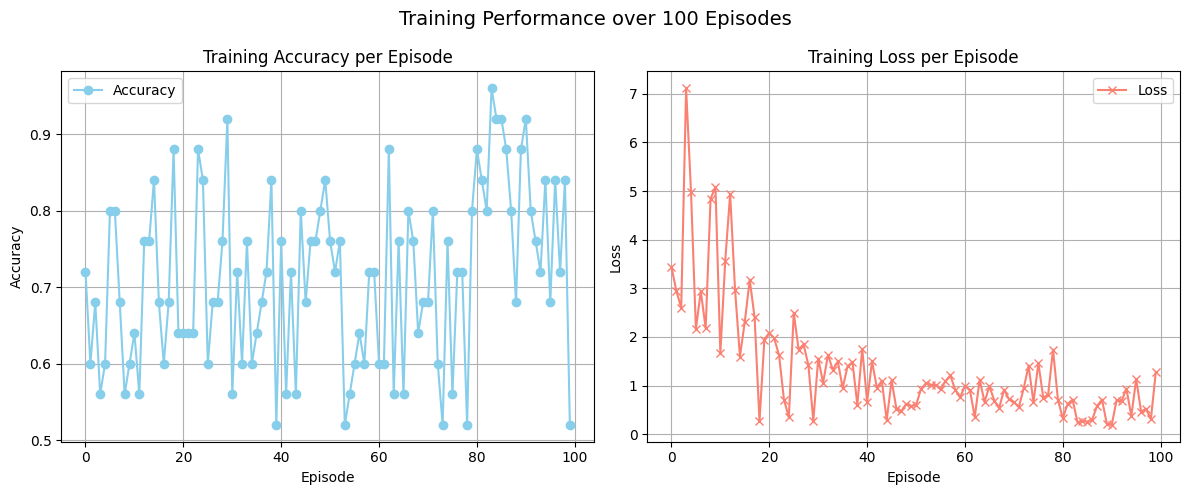

ProtoNet(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scale_activation): 

In [11]:
# Train
protonet = ProtoNet().to(device)
train_protonet(train_dir, protonet)



In [12]:
import os

def save_model(model, model_name="protonet"):
    save_dir = "/kaggle/working/"
    os.makedirs(save_dir, exist_ok=True)

    # Save PyTorch model
    torch.save(model.state_dict(), os.path.join(save_dir, f"{model_name}.pt"))
    print(f"✅ PyTorch model saved to: {save_dir}{model_name}.pt")

    # Dummy input for ONNX export (matches input shape)
    dummy_input = torch.randn(1, 3, 224, 224).to(device)
    model.eval()  # Set to eval mode for export

    # Save ONNX model
    torch.onnx.export(
        model, dummy_input,
        os.path.join(save_dir, f"{model_name}.onnx"),
        export_params=True,
        opset_version=11,
        do_constant_folding=True,
        input_names=['input'],
        output_names=['embedding'],
        dynamic_axes={'input': {0: 'batch_size'}, 'embedding': {0: 'batch_size'}}
    )
    print(f"✅ ONNX model saved to: {save_dir}{model_name}.onnx")
    
save_model(protonet, model_name="protonet_effnet")


✅ PyTorch model saved to: /kaggle/working/protonet_effnet.pt
✅ ONNX model saved to: /kaggle/working/protonet_effnet.onnx
